<a href="https://colab.research.google.com/github/coulibalymoumouni/Python_seance/blob/main/Exam_python_code_19_03_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installer pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [145]:
#accéder aux données de l'exam
from pycaret.datasets import get_data
df=get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [146]:
#1-afficher les statistiques descriptives de l'ensemble des variables
df.describe(include='all').round(2).T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.61,0.25,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,NaN,NaN,NaN,0.72,0.17,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,NaN,NaN,NaN,3.8,1.23,2.0,3.0,4.0,5.0,7.0
average_montly_hours,14999.0,NaN,NaN,NaN,201.05,49.94,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,NaN,NaN,NaN,3.5,1.46,2.0,3.0,3.0,4.0,10.0
Work_accident,14999.0,NaN,NaN,NaN,0.14,0.35,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,NaN,NaN,NaN,0.02,0.14,0.0,0.0,0.0,0.0,1.0
department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left,14999.0,NaN,NaN,NaN,0.24,0.43,0.0,0.0,0.0,0.0,1.0


In [39]:
#au vu des statistiques ci-dessus, je constate que :
#on a 14999 valeurs non manquantes dans chaque colonne
#on a 10 valeurs uniques au niveau du département et le top c'est la modalité sales avec une valeur de 4140
#on a aussi 3 niveaux de salaire et le top c'est la modalité low avec une valeur de 7316
#les moyennes et écart-types des variables numériques sont indiquées ainsi que les valeurs minimum et maximum

In [147]:
#verifions les informations générales du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
#on a 2 variables flottantes, 6 valeurs entières et 2 valeurs catégorielles

In [148]:
#vérifions la ventilation de la variable department
df['department'].value_counts()

,count
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [149]:
#vérifions la ventilation de la variable salary
df['salary'].value_counts()

,count
salary,
low,7316
medium,6446
high,1237


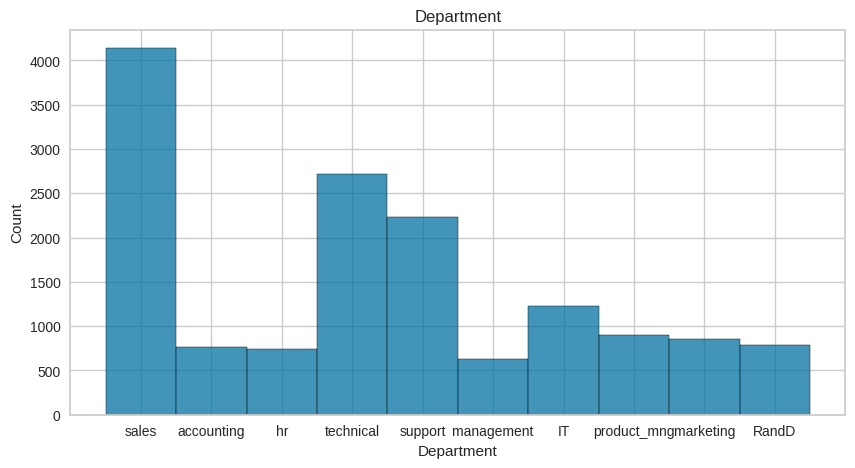

In [150]:
#2-faisons de la datavisualisation à partir des graphiques, pour cela importons la bibliothèque seaborn
#et la bibliothèque matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Department')
plt.xlabel('Department')
plt.ylabel('Count')
sns.histplot(df['department'])
plt.show()

In [ ]:
#ce histogramme confirme le departement qui a la valeur maximale

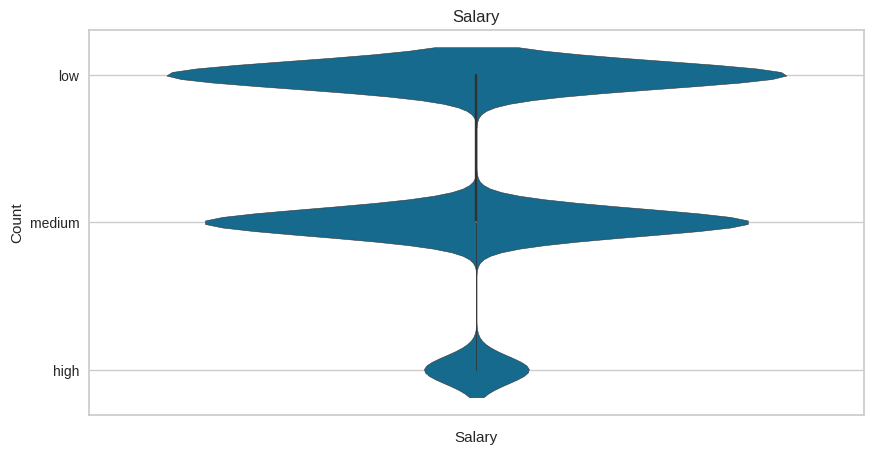

In [151]:
#verifions aussi la datavisualisation du niveau de salaire des employés
plt.figure(figsize=(10,5))
plt.title('Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
sns.violinplot(df['salary'])
plt.show()

In [ ]:
#ce graphique montre que les employés qui ont un niveau de salaire faible sont supérieurs à ceux qui ont un niveau de salaire moyen
#par contre ceux qui ont des salaires elevés sont petits

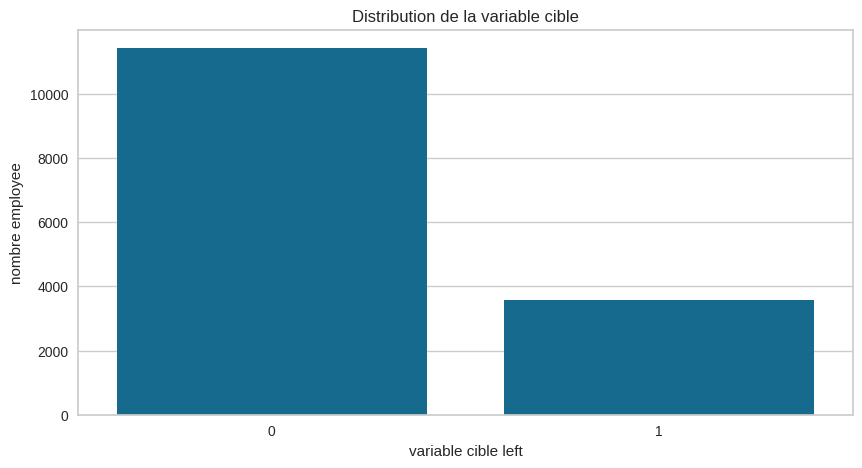

In [152]:
#verifions aussi la distribution de la variable cible left c'est-à-dire les empoyes qui ont
#quitté l'entreprise representés par 1 et ceux qui sont restés representés par 0
plt.figure(figsize=(10,5))
plt.title('Distribution de la variable cible')
plt.xlabel('variable cible left')
plt.ylabel('nombre employee')
sns.countplot(x='left',data=df)
plt.show()

In [ ]:
#Ce graphique montre que ceux qui ont quitté l'entreprise c'est-à-dire 1 sont plus petits que ceux qui sont restés 0

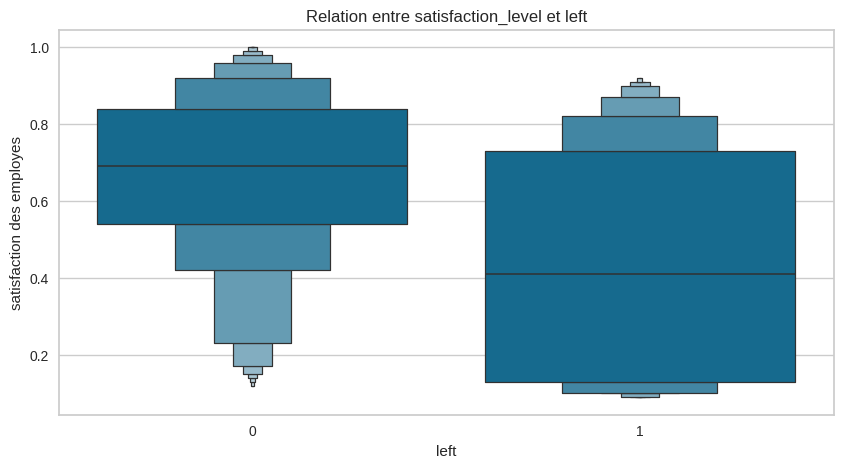

In [153]:
#visualiser par un graphique aussi la relation entre satisfaction_level et left
#pour déterminer le niveau de satisfaction de ceux qui ont quitté l'entreprise et ceux qui sont restés
plt.figure(figsize=(10,5))
plt.title('Relation entre satisfaction_level et left')
plt.xlabel('left')
plt.ylabel('satisfaction des employes')
sns.boxenplot(x='left',y='satisfaction_level',data=df)
plt.show()

<Axes: title={'center': 'Relation entre number_project et left'}, xlabel='left', ylabel='nombre de projets realisés par les employes'>

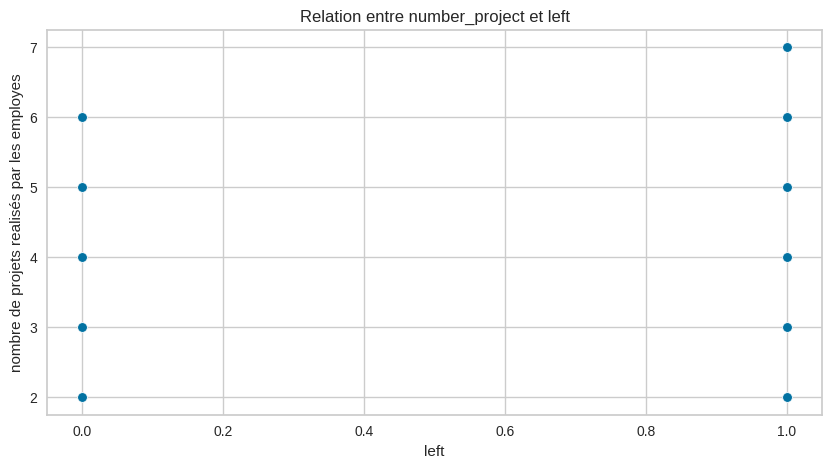

In [154]:
#visualiser la relation entre number_project et left
plt.figure(figsize=(10,5))
plt.title('Relation entre number_project et left')
plt.xlabel('left')
plt.ylabel('nombre de projets realisés par les employes')
sns.scatterplot(x='left',y='number_project',data=df)

In [ ]:
#Ce graphique montre que ceux qui ont quitté l'entreprise ont réalisé plus de projets que ceux qui sont restés

<Axes: title={'center': 'Relation entre time_spend_company et left'}, xlabel='left', ylabel='nombre de temps passé par les employes'>

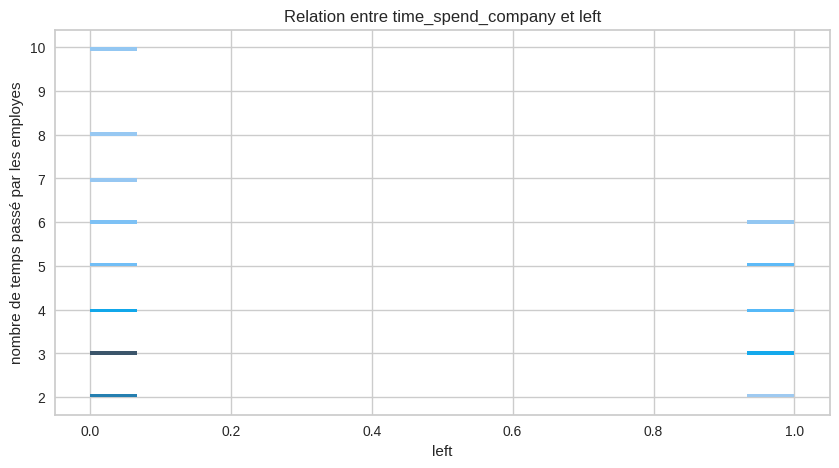

In [155]:
#visualiser la relation entre time_spend_company et left
plt.figure(figsize=(10,5))
plt.title('Relation entre time_spend_company et left')
plt.xlabel('left')
plt.ylabel('nombre de temps passé par les employes')
sns.histplot(x='left',y='time_spend_company',data=df)



In [ ]:
#ce graphique ci-dessus montre que les employés qui partent ont passé moins de temps dans l'entreprise
#que ceux qui sont restés

In [156]:
#3- Vérification des valeurs manquantes
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
department,0
salary,0
left,0


In [157]:
#toutes les valeurs ci-dessus sont à 0. Cela signifie qu'il n'ya pas de valeurs manquantes

<Axes: ylabel='time_spend_company'>

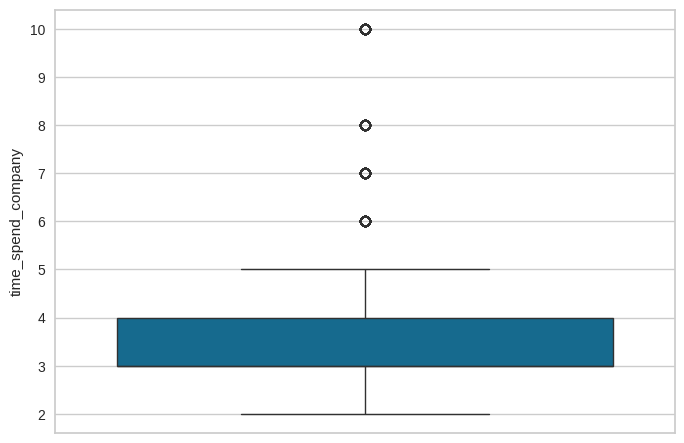

In [158]:
#4- Vérification des valeurs aberrantes à partir de la bibliothèque seaborn
#en faisant le tour des variables pour detecter celles qui contiennent ces valeurs aberrantes
sns.boxplot(df['time_spend_company'])


<Axes: ylabel='promotion_last_5years'>

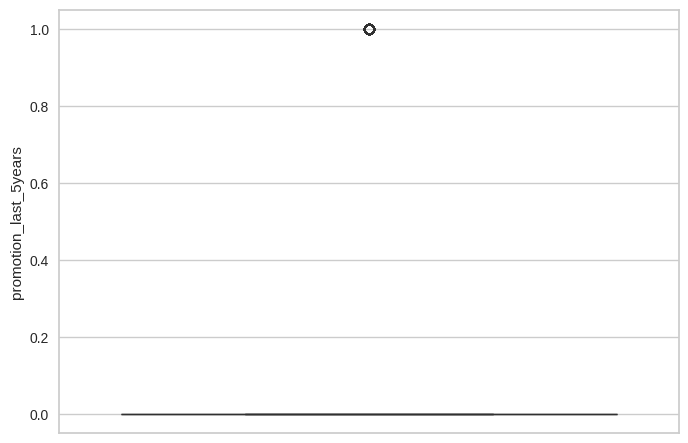

In [159]:
sns.boxplot(df['promotion_last_5years'])

<Axes: ylabel='Work_accident'>

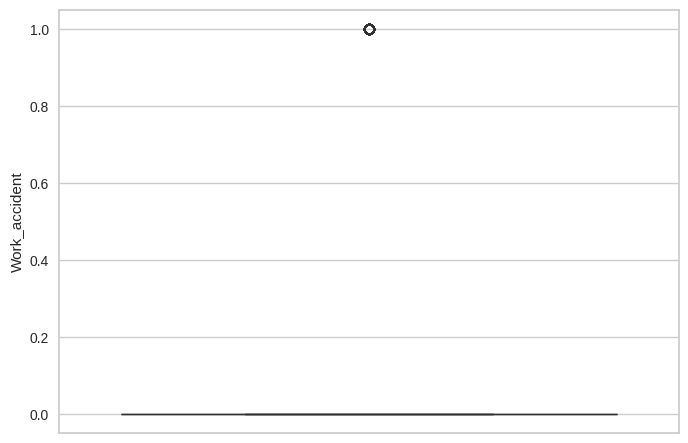

In [160]:
sns.boxplot(df['Work_accident'])

In [74]:
#on constate que les 3 variables time_spend_company, promotion_last_5years et Work_accident ont des valeurs aberrantes
#On va traiter ces valeurs par la méthode de z-score


In [161]:
#calcul de la moyenne et de l'ecart-type de la variable time_spend_company
mean_time=df['time_spend_company'].mean()
print(mean_time)
std_time=df['time_spend_company'].std()
print(std_time)


3.498233215547703
1.4601362305354546


In [162]:
#creation et affichage de la variable z-score
df['z_score_time']=df['time_spend_company']-mean_time/std_time
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,z_score_time
0,0.38,0.53,2,157,3,0,0,sales,low,1,0.604173
1,0.80,0.86,5,262,6,0,0,sales,medium,1,3.604173
2,0.11,0.88,7,272,4,0,0,sales,medium,1,1.604173
3,0.72,0.87,5,223,5,0,0,sales,low,1,2.604173
4,0.37,0.52,2,159,3,0,0,sales,low,1,0.604173


In [163]:
#remplacer les valeurs superieures à un seuil de 3 de la valeur z-score
df.loc[df['z_score_time']>3,'time_spend_company']=df['time_spend_company'].median()

<Axes: ylabel='time_spend_company'>

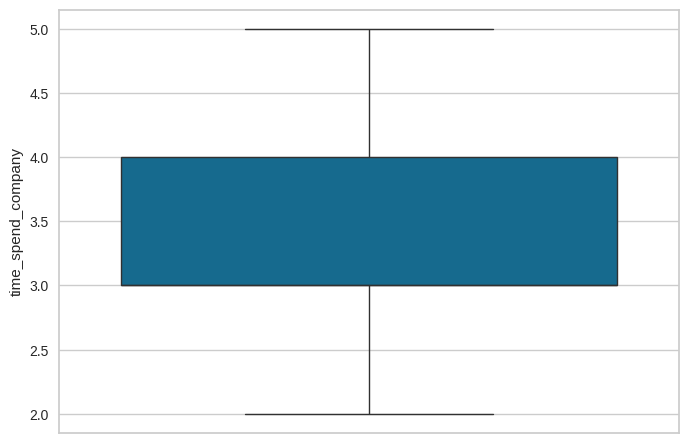

In [164]:
#verifier voir s'il ya toujours des valeurs aberrantes
sns.boxplot(df['time_spend_company'])

In [165]:
#imputation de la variable promotion_last_5years en supprimant toutes les valeurs inferieures à 1
df_year=df[df['promotion_last_5years']>1]


<Axes: >

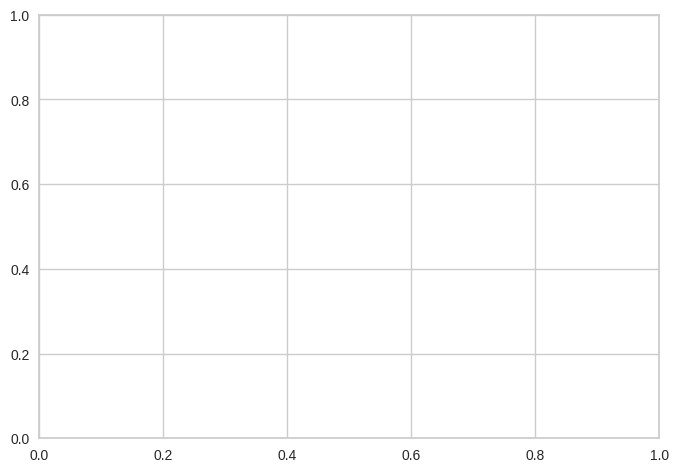

In [166]:
#verifier voir s'il ya toujours des valeurs aberrantes
sns.boxplot(df_year['promotion_last_5years'])

In [167]:
#imputation de la variable Work_accident en supprimant toutes les valeurs inferieures à 1
df_work=df[df['Work_accident']>1]

<Axes: >

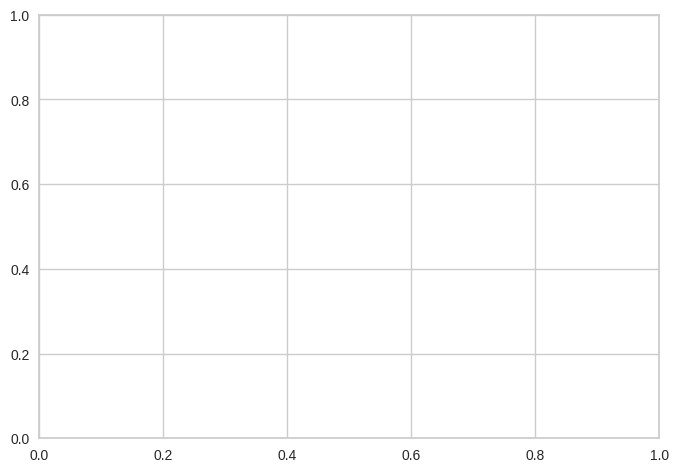

In [168]:
#verifier voir s'il ya toujours des valeurs aberrantes
sns.boxplot(df_year['Work_accident'])

In [170]:
#6- modélisation de la variable cible left
#appeler la bibiothèque pycaret pour faire un type de classification Experiment
from pycaret.classification import ClassificationExperiment

#calibrer le 1er modèle
s=ClassificationExperiment()


In [172]:
#initialiser une session d'exécution en prenant l'échantillon d'apprentissage avec une taille
#de 70% et l'echantillon de test 30%
s.setup(data=df,target='left',session_id=123, train_size=0.7)



,Description,Value
0,Session id,123
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 11)"
4,Transformed data shape,"(14999, 22)"
5,Transformed train set shape,"(10499, 22)"
6,Transformed test set shape,"(4500, 22)"
7,Numeric features,8
8,Categorical features,2
9,Preprocess,True


In [ ]:
#on remarque que la variable cible binaire est left et la taille globale de l'échantillon est de 14999 dont 10499 échantillons d'apprentissage
#et 4500 échantillons de test. Il ya 8 valeurs numeriques selectionnées et 2 valeurs catégorielles selectionnées.

In [173]:
#afficher tous les algorithmes possibles en comparant leurs performances et en les stockant dans la variable best_model
best_model=s.compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9883,0.9915,0.9600,0.9906,0.9750,0.9673,0.9676,0.5390
xgboost,Extreme Gradient Boosting,0.9856,0.9925,0.9572,0.9820,0.9694,0.9600,0.9602,0.1540
lightgbm,Light Gradient Boosting Machine,0.9856,0.9935,0.9524,0.9868,0.9692,0.9599,0.9602,0.7940
et,Extra Trees Classifier,0.9843,0.9912,0.9544,0.9791,0.9666,0.9563,0.9565,0.4380
gbc,Gradient Boosting Classifier,0.9766,0.9886,0.9296,0.9708,0.9497,0.9345,0.9348,0.6330
dt,Decision Tree Classifier,0.9750,0.9703,0.9612,0.9360,0.9483,0.9319,0.9321,0.0760
ada,Ada Boost Classifier,0.9614,0.9832,0.9132,0.9240,0.9185,0.8933,0.8933,0.2430
knn,K Neighbors Classifier,0.9361,0.9693,0.9128,0.8351,0.8720,0.8295,0.8312,0.2020
qda,Quadratic Discriminant Analysis,0.8631,0.9122,0.7756,0.6940,0.7299,0.6391,0.6430,0.0680
lr,Logistic Regression,0.8198,0.8691,0.4936,0.6642,0.5651,0.4548,0.4634,0.9360


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [174]:
#afficher le meilleur modèle
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
#Parmi tous les algorithmes, le Random Forest Classifier est le meilleur car il affiche un accuracy de 0,98
#avec un auc de 0,99, une précision de 0.99, un recall de 0,96 et un f1-score de 0,97

In [175]:
#afficher tous les metriques d'évaluation du meilleur model
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

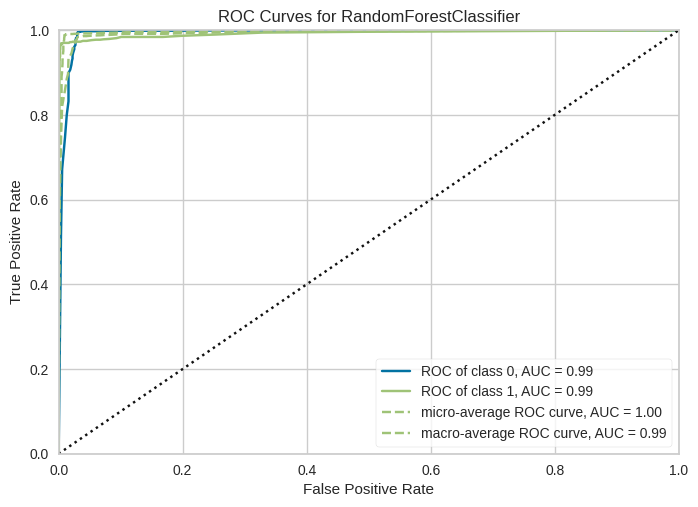

In [182]:
#afficher uniquement la courbe de l'AUC
s.plot_model(best_model,plot='auc')

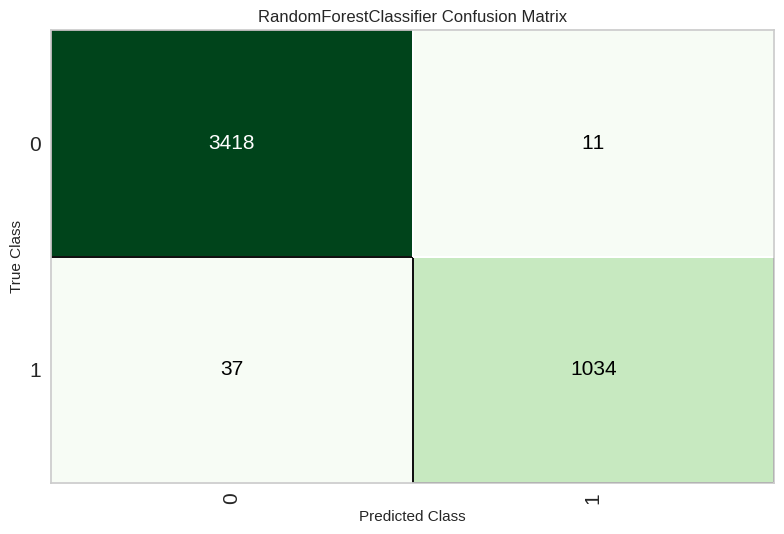

In [181]:
#afficher la matrice de confusion uniquement

s.plot_model(best_model,plot='confusion_matrix')

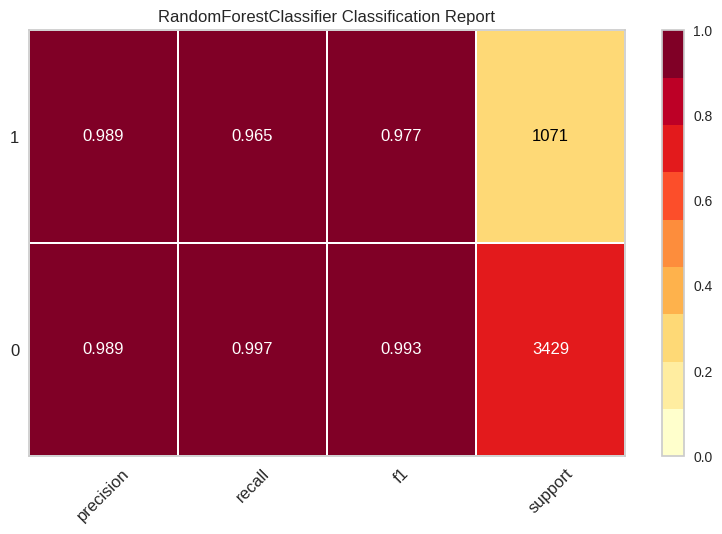

In [180]:
#afficher la precision, le recall et le f1_score uniquement

s.plot_model(best_model,plot='class_report')

In [183]:
#appliquer notre model sur une base de données "ici df"
prevision1 = s.predict_model(best_model,data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9968,0.9983,0.9896,0.9969,0.9933,0.9912,0.9912


In [ ]:
#la prévision donne encore des résultats meilleurs avec un recall de 0,98 contre 0,96

In [184]:
#afficher les prévisions
prevision1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,z_score_time,left,prediction_label,prediction_score
0,0.38,0.53,2,157,3,0,0,sales,low,0.604173,1,1,1.00
1,0.80,0.86,5,262,3,0,0,sales,medium,3.604173,1,1,0.98
2,0.11,0.88,7,272,4,0,0,sales,medium,1.604173,1,1,1.00
3,0.72,0.87,5,223,5,0,0,sales,low,2.604173,1,1,0.95
4,0.37,0.52,2,159,3,0,0,sales,low,0.604173,1,1,1.00


In [185]:
#exporter les données sous format excel
prevision1.to_excel('prevision_finale.xlsx')

In [188]:
#appeler la bibiothèque pycaret pour faire un type de classification regression
from pycaret.regression import RegressionExperiment

#calibrer le 2eme modèle
s=RegressionExperiment()


In [189]:
#initialiser une session d'exécution en prenant l'échantillon d'apprentissage avec une taille
#de 70% et l'echantillon de test 30%
s.setup(data=df,target='left',session_id=123, train_size=0.7)


,Description,Value
0,Session id,123
1,Target,left
2,Target type,Regression
3,Original data shape,"(14999, 11)"
4,Transformed data shape,"(14999, 22)"
5,Transformed train set shape,"(10499, 22)"
6,Transformed test set shape,"(4500, 22)"
7,Numeric features,8
8,Categorical features,2
9,Preprocess,True


In [ ]:
#ce sont les mêmes informations que le 1er modèle mais ici la variable cible est de type regression

In [190]:
#afficher tous les algorithmes possibles en comparant leurs performances et en les stockant dans la variable best_model
best_model=s.compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0284,0.0127,0.1123,0.9301,0.0822,0.0426,1.0220
rf,Random Forest Regressor,0.0302,0.0129,0.1134,0.9286,0.0822,0.0502,1.2450
xgboost,Extreme Gradient Boosting,0.0417,0.0146,0.1206,0.9195,0.0878,0.0575,0.1530
lightgbm,Light Gradient Boosting Machine,0.0453,0.0174,0.1313,0.9041,0.0928,0.0850,1.3560
gbr,Gradient Boosting Regressor,0.0626,0.0234,0.1524,0.8710,0.1087,0.1195,0.5270
dt,Decision Tree Regressor,0.0237,0.0237,0.1535,0.8688,0.1064,0.0373,0.0930
ada,AdaBoost Regressor,0.0850,0.0401,0.1996,0.7789,0.1398,0.1718,0.0830
knn,K Neighbors Regressor,0.0793,0.0480,0.2187,0.7351,0.1570,0.1164,0.0950
br,Bayesian Ridge,0.2868,0.1300,0.3605,0.2829,0.2546,0.5458,0.0570
ridge,Ridge Regression,0.2868,0.1300,0.3605,0.2829,0.2546,0.5449,0.0640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [191]:
#afficher le meilleur modèle
print(best_model)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error',
                    max_depth=None, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, monotonic_cst=None,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


In [ ]:
#Parmi tous les algorithmes, c'est Extra Trees Regressor qui est le meilleur car il affiche
#un MSE de 0.0127 avec un R2 de 0.9301 très proche de 1.

In [192]:
#afficher tous les metriques d'évaluation du meilleur model
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#appliquer notre model sur une base de données "ici df"
prevision2 = s.predict_model(best_model,data=df)